# Klasifikasi Tingkat Alkohol pada Botol Minuman Menggunakan Time Series Spectrograph

# Business Understanding

## Pendahuluan

Pemalsuan produk minuman keras, khususnya whisky dan spirits, menjadi masalah serius bagi produsen dan konsumen. Pemeriksaan tradisional sering memerlukan pengambilan sampel fisik dari botol, yang merusak produk dan memakan waktu.

Untuk mengatasi hal ini, penelitian menggunakan spektrografi non-intrusif untuk mendeteksi kadar alkohol (ethanol) dalam botol tanpa harus membukanya. Data spektrografi ini dapat dianalisis menggunakan model klasifikasi time series untuk membedakan botol asli dari botol palsu berdasarkan tingkat alkoholnya.

Proyek ini bertujuan mengembangkan sistem otomatis yang dapat:

Memprediksi kelas alkohol (E35, E38, E40, E45) dengan akurasi tinggi.

Mempermudah proses Quality Control (QC) bagi produsen minuman keras.

Memberikan solusi cepat dan non-intrusif untuk mendeteksi pemalsuan botol.

Stakeholder utama meliputi produsen minuman keras, laboratorium QC, dan regulator yang ingin memastikan keamanan dan kualitas produk di pasaran.

Kriteria keberhasilan proyek meliputi akurasi prediksi ≥ 80%, kemampuan generalisasi ke botol baru, dan prediksi yang cepat agar bisa digunakan dalam proses QC real-time.

# Data Understanding

## Sumber Dataset

Dataset ini berasal dari proyek penelitian Scotch Whisky Research Institute untuk mendeteksi botol minuman palsu secara non-intrusif. Tujuan utamanya adalah mengidentifikasi kadar alkohol (ethanol) tanpa membuka botol, dengan menggunakan spektrografi. Dataset mencakup 20 jenis botol berbeda dan empat tingkat alkohol: 35%, 38%, 40%, dan 45%.


Berikut merupakan link datasetnya :

https://www.timeseriesclassification.com/description.php?Dataset=EthanolLevel

dibawah merupakan tabel informasi terkait dataset :

| Fitur               | Keterangan                                                                                                              |
| ------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| Train Size          | 504 series                                                                                                              |
| Test Size           | 500 series                                                                                                              |
| Panjang tiap series | 1751 titik                                                                                                              |
| Jumlah kelas        | 4 (E35, E38, E40, E45)                                                                                                  |
| Dimensi             | 1 (univariate)                                                                                                          |
| Tipe                | SPECTRO (spectrograph)                                                                                                  |



## Eksplorasi Data

### 1. Load Dataset

Kode di bawah digunakan untuk **memuat dataset EthanolLevel dari UCR Time Series Classification Archive** menggunakan library `tslearn`. Pertama, `UCR_UEA_datasets()` membuat objek dataset yang memungkinkan akses ke seluruh dataset UCR/UEA. Dengan fungsi `load_dataset("EthanolLevel")`, kita memuat **data training dan testing** beserta labelnya: `X_train` dan `X_test` berisi time series spektrografi (masing-masing sepanjang 1751 titik), sedangkan `y_train` dan `y_test` berisi kelas alkohol masing-masing (E35, E38, E40, E45). Terakhir, semua data dikonversi ke format **numpy array** untuk memudahkan pengolahan dan analisis lebih lanjut, seperti visualisasi, preprocessing, atau pemodelan machine learning.


In [1]:
!pip install tslearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 9.3 MB/s eta 0:00:00


In [55]:
from tslearn.datasets import UCR_UEA_datasets
import numpy as np

dataset = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = dataset.load_dataset("EthanolLevel")

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


### 2. Informasi data

Kode ini bertujuan untuk menyusun dan menampilkan informasi dasar dataset EthanolLevel dalam bentuk yang mudah dibaca. Pertama, np.squeeze(X_train) digunakan untuk mengubah array 3D (504, 1751, 1) menjadi 2D (504, 1751), sehingga bisa dimasukkan ke dalam pandas DataFrame. Setiap kolom diberi nama F1 sampai F1751 untuk mewakili titik spektrografi, dan kolom tambahan "Class" menampung label alkohol masing-masing sampel. Selanjutnya, kode ini menampilkan jumlah baris dan kolom, daftar nama fitur, 10 baris pertama dataset, serta distribusi kelas pada data training. Dengan demikian, kita memperoleh gambaran awal tentang struktur dataset, skala fitur, dan keseimbangan kelas sebelum melakukan eksplorasi lebih lanjut atau preprocessing.

In [56]:
import pandas as pd
from collections import Counter

# Hapus dimensi terakhir agar menjadi 2D (504, 1751)
X_train_2d = np.squeeze(X_train)

# Buat DataFrame
col_names = [f"F{i+1}" for i in range(X_train_2d.shape[1])]
df_train = pd.DataFrame(X_train_2d, columns=col_names)

# Tambahkan kolom label
df_train["Class"] = y_train

# Info dataset
print("Jumlah baris (rows):", df_train.shape[0])
print("Jumlah kolom (features + label):", df_train.shape[1])
print("\nNama fitur / kolom:")
print(df_train.columns.tolist())
print("\n10 data pertama (head):")
print(df_train.head(10))

# Distribusi kelas
print("\nDistribusi kelas pada data train:", Counter(y_train))


Jumlah baris (rows): 504
Jumlah kolom (features + label): 1752

Nama fitur / kolom:
['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71', 'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F80', 'F81', 'F82', 'F83', 'F84', 'F85', 'F86', 'F87', 'F88', 'F89', 'F90', 'F91', 'F92', 'F93', 'F94', 'F95', 'F96', 'F97', 'F98', 'F99', 'F100', 'F101', 'F102', 'F103', 'F104', 'F105', 'F106', 'F107', 'F108', 'F109', 'F110', 'F111', 'F112', 'F113', 'F114', 'F115', 'F116', 'F117', 'F118', 'F119', 'F120', 'F121', 'F122', 'F123', 'F124', 'F125', 'F126', 'F127', 'F128',

### 3. Visualisasi data

Kode pertama digunakan untuk memvisualisasikan beberapa contoh time series dari dataset EthanolLevel. Dengan plt.plot(X_train[i], label=f'Class {y_train[i]}'), lima sampel pertama dari data training diplot secara bergantian, dengan label menunjukkan kelas alkohol masing-masing (E35, E38, E40, E45). Visualisasi ini membantu kita melihat pola spektrografi individual, variasi antar sampel, dan memberi gambaran awal tentang karakteristik data sebelum modeling.

Kode kedua bertujuan untuk menggambarkan pola rata-rata spektrografi per kelas. Dengan menghitung mean_series = X_train[y_train==c].mean(axis=0), kita memperoleh rata-rata sinyal spektrografi untuk setiap kelas alkohol. Plot ini memudahkan identifikasi perbedaan pola spektra antar kelas secara keseluruhan, sehingga kita bisa menilai apakah klasifikasi antar kelas mungkin dilakukan berdasarkan karakteristik time series yang berbeda.

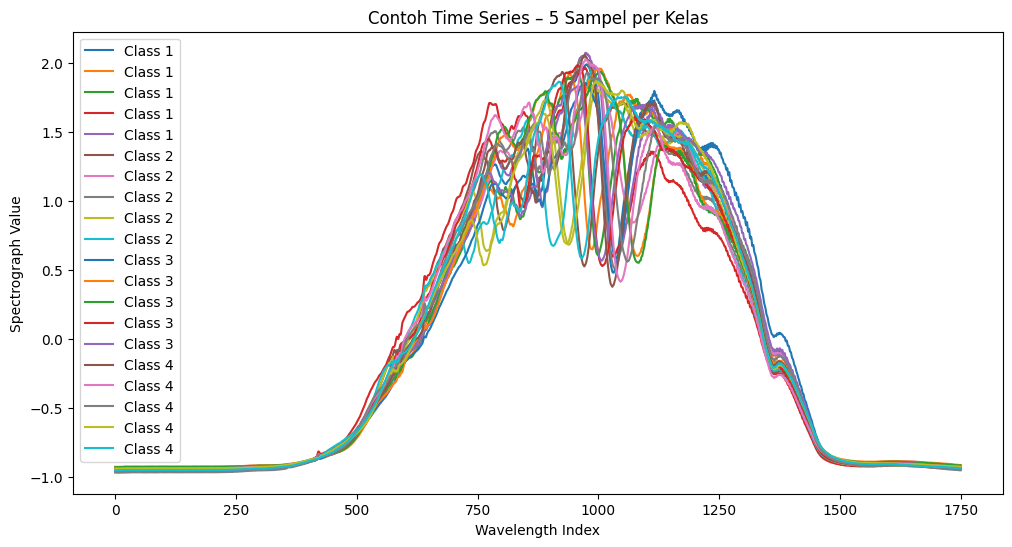

In [14]:
plt.figure(figsize=(12,6))

classes = np.unique(y_train)  # [1,2,3,4]
samples_per_class = 5

for c in classes:
    # ambil indeks sampel dengan kelas c
    idx = np.where(y_train == c)[0][:samples_per_class]
    for i in idx:
        plt.plot(X_train[i], label=f'Class {int(c)}')

plt.title("Contoh Time Series – 5 Sampel per Kelas")
plt.xlabel("Wavelength Index")
plt.ylabel("Spectrograph Value")
plt.legend()
plt.show()



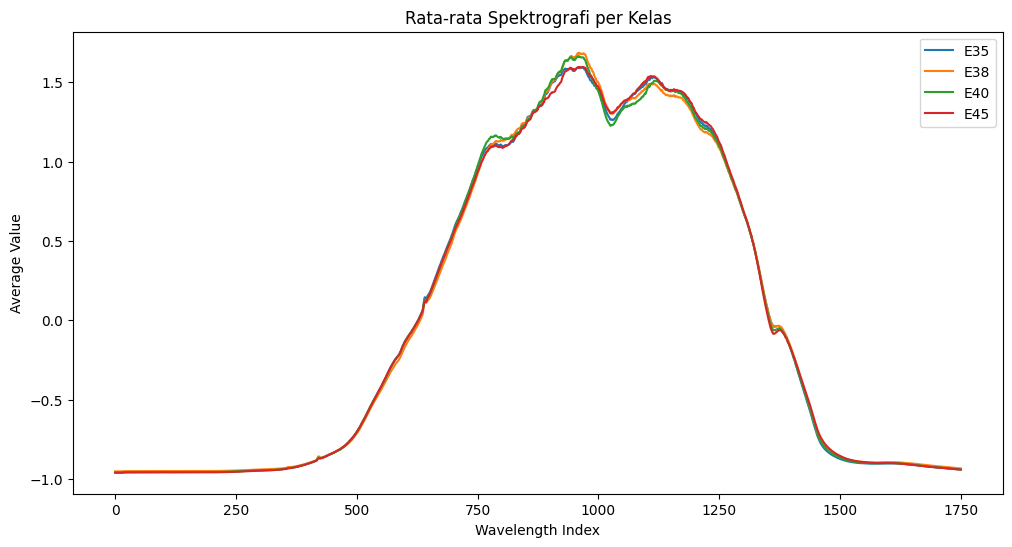

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping label numerik ke nama kelas
label_map = {1: "E35", 2: "E38", 3: "E40", 4: "E45"}

# Ambil kelas unik
classes = np.unique(y_train)

plt.figure(figsize=(12,6))

# Plot rata-rata spektrum per kelas
for c in classes:
    # Ambil semua sampel untuk kelas c
    mean_series = X_train[y_train==c].mean(axis=0)
    plt.plot(mean_series, label=label_map[c])  # gunakan nama kelas

plt.title("Rata-rata Spektrografi per Kelas")
plt.xlabel("Wavelength Index")
plt.ylabel("Average Value")
plt.legend()
plt.show()


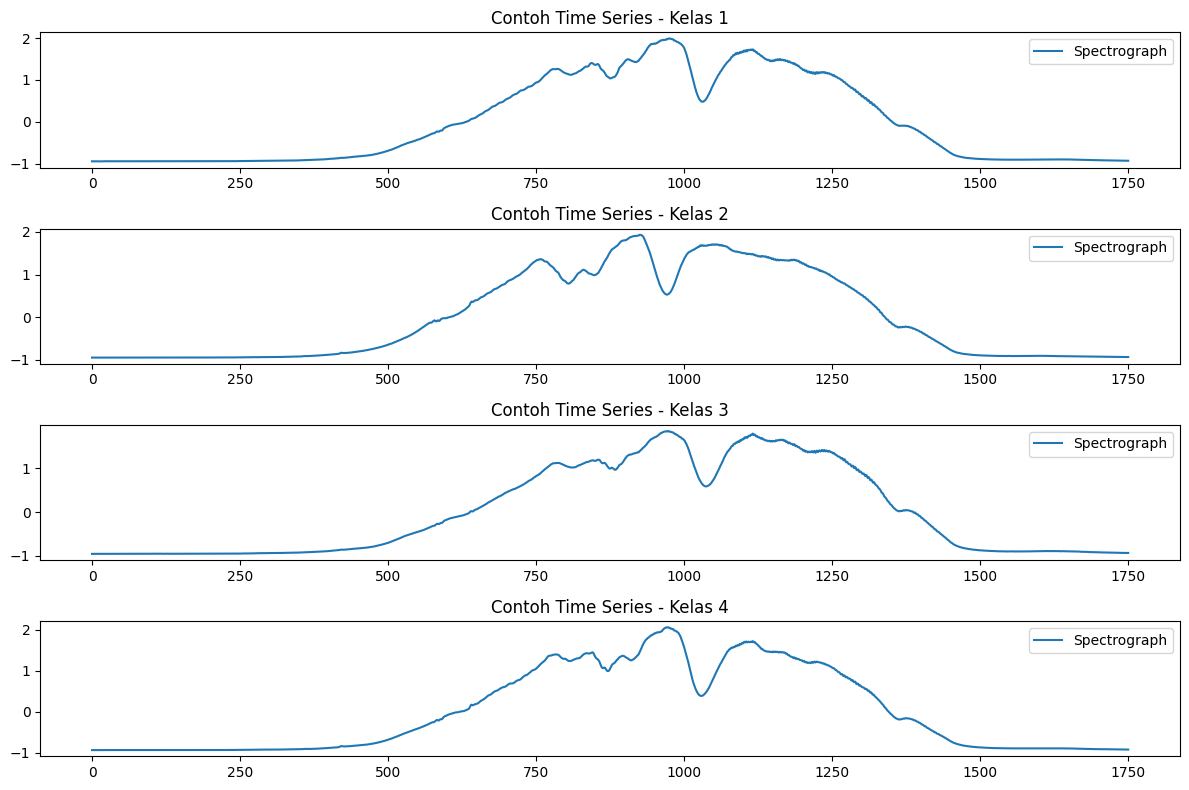

In [17]:
plt.figure(figsize=(12, 8))

for i, cls in enumerate(classes):
    idx = np.where(y_train == cls)[0][0]   # ambil satu sampel per kelas
    sample = X_train[idx]  # bentuk (1751, 1)

    plt.subplot(len(classes), 1, i+1)
    plt.plot(sample[:,0], label='Spectrograph')  # hanya channel 1
    plt.title(f"Contoh Time Series - Kelas {cls}")
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Distribusi label train: Counter({np.int64(1): 126, np.int64(2): 126, np.int64(3): 126, np.int64(4): 126})
Distribusi label test : Counter({np.int64(1): 126, np.int64(3): 126, np.int64(2): 124, np.int64(4): 124})


/tmp/ipython-input-823357226.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[label_map[k] for k in train_dist.keys()],


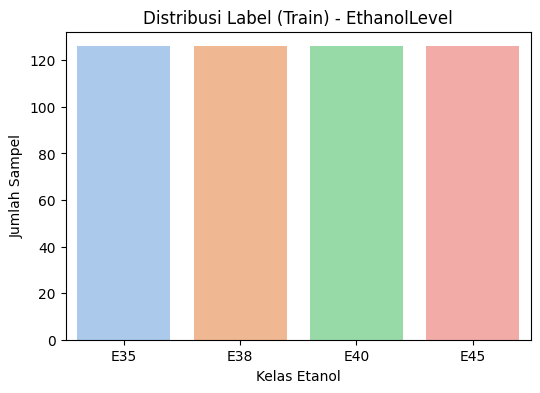

/tmp/ipython-input-823357226.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[label_map[k] for k in test_dist.keys()],


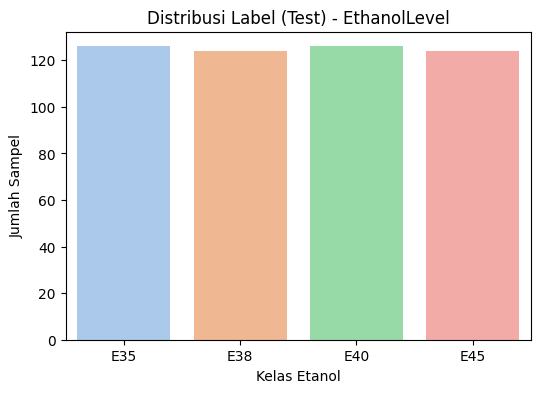

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Mapping label numerik ke nama kelas
label_map = {1: "E35", 2: "E38", 3: "E40", 4: "E45"}

# Hitung distribusi label
train_dist = Counter(y_train)
test_dist  = Counter(y_test)

print("Distribusi label train:", train_dist)
print("Distribusi label test :", test_dist)

# Visualisasi distribusi label train
plt.figure(figsize=(6,4))
sns.barplot(x=[label_map[k] for k in train_dist.keys()],
            y=list(train_dist.values()),
            palette="pastel")
plt.title("Distribusi Label (Train) - EthanolLevel")
plt.xlabel("Kelas Etanol")
plt.ylabel("Jumlah Sampel")
plt.show()

# Visualisasi distribusi label test
plt.figure(figsize=(6,4))
sns.barplot(x=[label_map[k] for k in test_dist.keys()],
            y=list(test_dist.values()),
            palette="pastel")
plt.title("Distribusi Label (Test) - EthanolLevel")
plt.xlabel("Kelas Etanol")
plt.ylabel("Jumlah Sampel")
plt.show()


# Preprocessing data

Dataset EthanolLevel sudah berbentuk time series numerik dengan panjang tetap (1751 poin), sehingga preprocessing tidak memerlukan perubahan panjang atau segmentasi. Namun tetap diperlukan beberapa langkah penting seperti scaling, train-test preparation, dan reshaping agar dapat digunakan oleh model machine learning atau deep learning.

## Normalisasi (Standard Scaling / MinMax Scaling)

Time series spektrografi memiliki rentang nilai yang berbeda antar sampel, sehingga model bisa bias terhadap skala besar. Normalisasi membuat seluruh fitur berada pada rentang yang sama, sehingga model belajar pola bentuk, bukan skala amplitudo.
Scaling dilakukan menggunakan StandardScaler, yang mengubah setiap fitur menjadi mean = 0 dan standar deviasi = 1. Hal ini penting untuk model seperti SVM, k-NN, Neural Networks, yang sangat sensitif terhadap perbedaan skala sinyal.

In [29]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Squeeze agar 2D
X_train_2d = np.squeeze(X_train)
X_test_2d = np.squeeze(X_test)

# Scaling per feature (per kolom)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

print("Shape train setelah scaling:", X_train_scaled.shape)
print("Shape test setelah scaling:", X_test_scaled.shape)


Shape train setelah scaling: (504, 1751)
Shape test setelah scaling: (500, 1751)


## Cek Missing value

Kode ini digunakan untuk mengecek apakah ada missing value pada dataset df_train. Pertama, df_train.isnull().sum() menghitung jumlah nilai kosong (NaN) di setiap kolom. Kemudian, missing[missing > 0] menampilkan hanya kolom yang memiliki missing value, sedangkan jika total missing value = 0 (missing.sum() > 0 bernilai False), akan menampilkan pesan "Tidak ada missing value". Dengan cara ini, kita bisa cepat mengetahui apakah dataset siap untuk preprocessing atau perlu penanganan nilai hilang.

In [54]:
import pandas as pd
import numpy as np

# ---------------------------------------------------
# 1. Cek missing value
# ---------------------------------------------------
print("=== Missing Value per Kolom ===")
missing = df_train.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Tidak ada missing value")

=== Missing Value per Kolom ===
Tidak ada missing value


## Deteksi Outlier
Kode ini melakukan deteksi dan visualisasi outlier pada dataset df_train dengan beberapa langkah. Pertama, dilakukan perhitungan IQR (Interquartile Range) untuk setiap kolom kecuali label (Class). IQR digunakan untuk menentukan batas bawah (Q1 - 1.5*IQR) dan batas atas (Q3 + 1.5*IQR) dari setiap fitur. Data yang berada di luar rentang ini dianggap outlier. Jumlah outlier untuk setiap fitur dicatat ke dalam dictionary outlier_summary, dan kemudian ditampilkan. Setelah itu, dibuat boxplot tunggal untuk satu fitur (feature) per kelas menggunakan Seaborn, yang memudahkan visualisasi nilai ekstrim atau outlier pada data berdasarkan kelas.

Langkah selanjutnya adalah menghapus outlier dari dataset. Dataset df_no_outlier dibuat sebagai salinan df_train, kemudian setiap fitur diperiksa kembali menggunakan metode IQR, dan baris yang mengandung nilai outlier dihilangkan. Hasil akhirnya adalah dataset yang lebih “bersih”, bebas dari outlier ekstrim, dan jumlah data yang tersisa dicetak. Selanjutnya, dibuat mapping label numerik ke label yang lebih deskriptif (E35, E38, E40, E45) untuk memudahkan interpretasi. Terakhir, dibuat boxplot per kelas untuk 10 fitur pertama, menampilkan distribusi nilai tiap fitur berdasarkan kelas etanol, sehingga kita bisa melihat pola distribusi dan outlier di tiap kelas secara visual.


=== Jumlah Outlier per Fitur ===
{'F1': 22, 'F2': 22, 'F3': 22, 'F4': 22, 'F5': 22, 'F6': 22, 'F7': 22, 'F8': 21, 'F9': 22, 'F10': 22, 'F11': 22, 'F12': 22, 'F13': 22, 'F14': 22, 'F15': 22, 'F16': 22, 'F17': 22, 'F18': 22, 'F19': 22, 'F20': 22, 'F21': 22, 'F22': 22, 'F23': 22, 'F24': 22, 'F25': 22, 'F26': 22, 'F27': 22, 'F28': 22, 'F29': 22, 'F30': 22, 'F31': 22, 'F32': 22, 'F33': 22, 'F34': 22, 'F35': 22, 'F36': 22, 'F37': 22, 'F38': 22, 'F39': 22, 'F40': 22, 'F41': 22, 'F42': 22, 'F43': 22, 'F44': 22, 'F45': 22, 'F46': 22, 'F47': 22, 'F48': 22, 'F49': 22, 'F50': 22, 'F51': 22, 'F52': 22, 'F53': 22, 'F54': 22, 'F55': 22, 'F56': 22, 'F57': 22, 'F58': 22, 'F59': 22, 'F60': 22, 'F61': 21, 'F62': 21, 'F63': 22, 'F64': 22, 'F65': 22, 'F66': 22, 'F67': 22, 'F68': 22, 'F69': 22, 'F70': 22, 'F71': 22, 'F72': 22, 'F73': 22, 'F74': 22, 'F75': 22, 'F76': 22, 'F77': 22, 'F78': 22, 'F79': 22, 'F80': 22, 'F81': 21, 'F82': 22, 'F83': 22, 'F84': 22, 'F85': 22, 'F86': 22, 'F87': 20, 'F88': 21, 'F89':

/tmp/ipython-input-3486013500.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ClassName", y=feature, data=df_train, palette="pastel", hue=None)


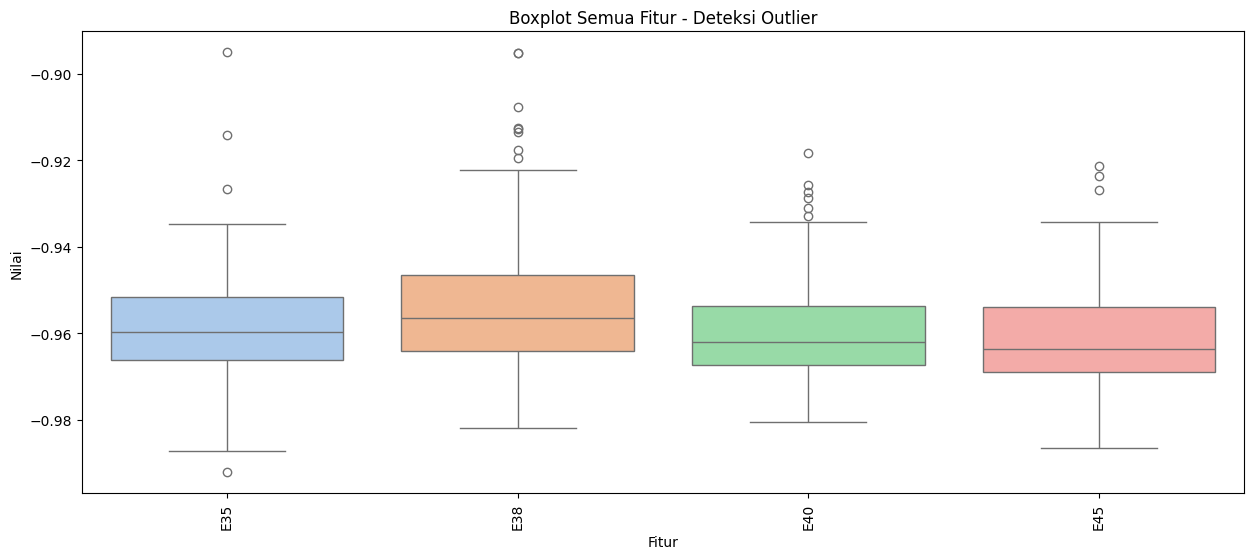

Sisa data setelah hapus outlier di semua fitur: 135


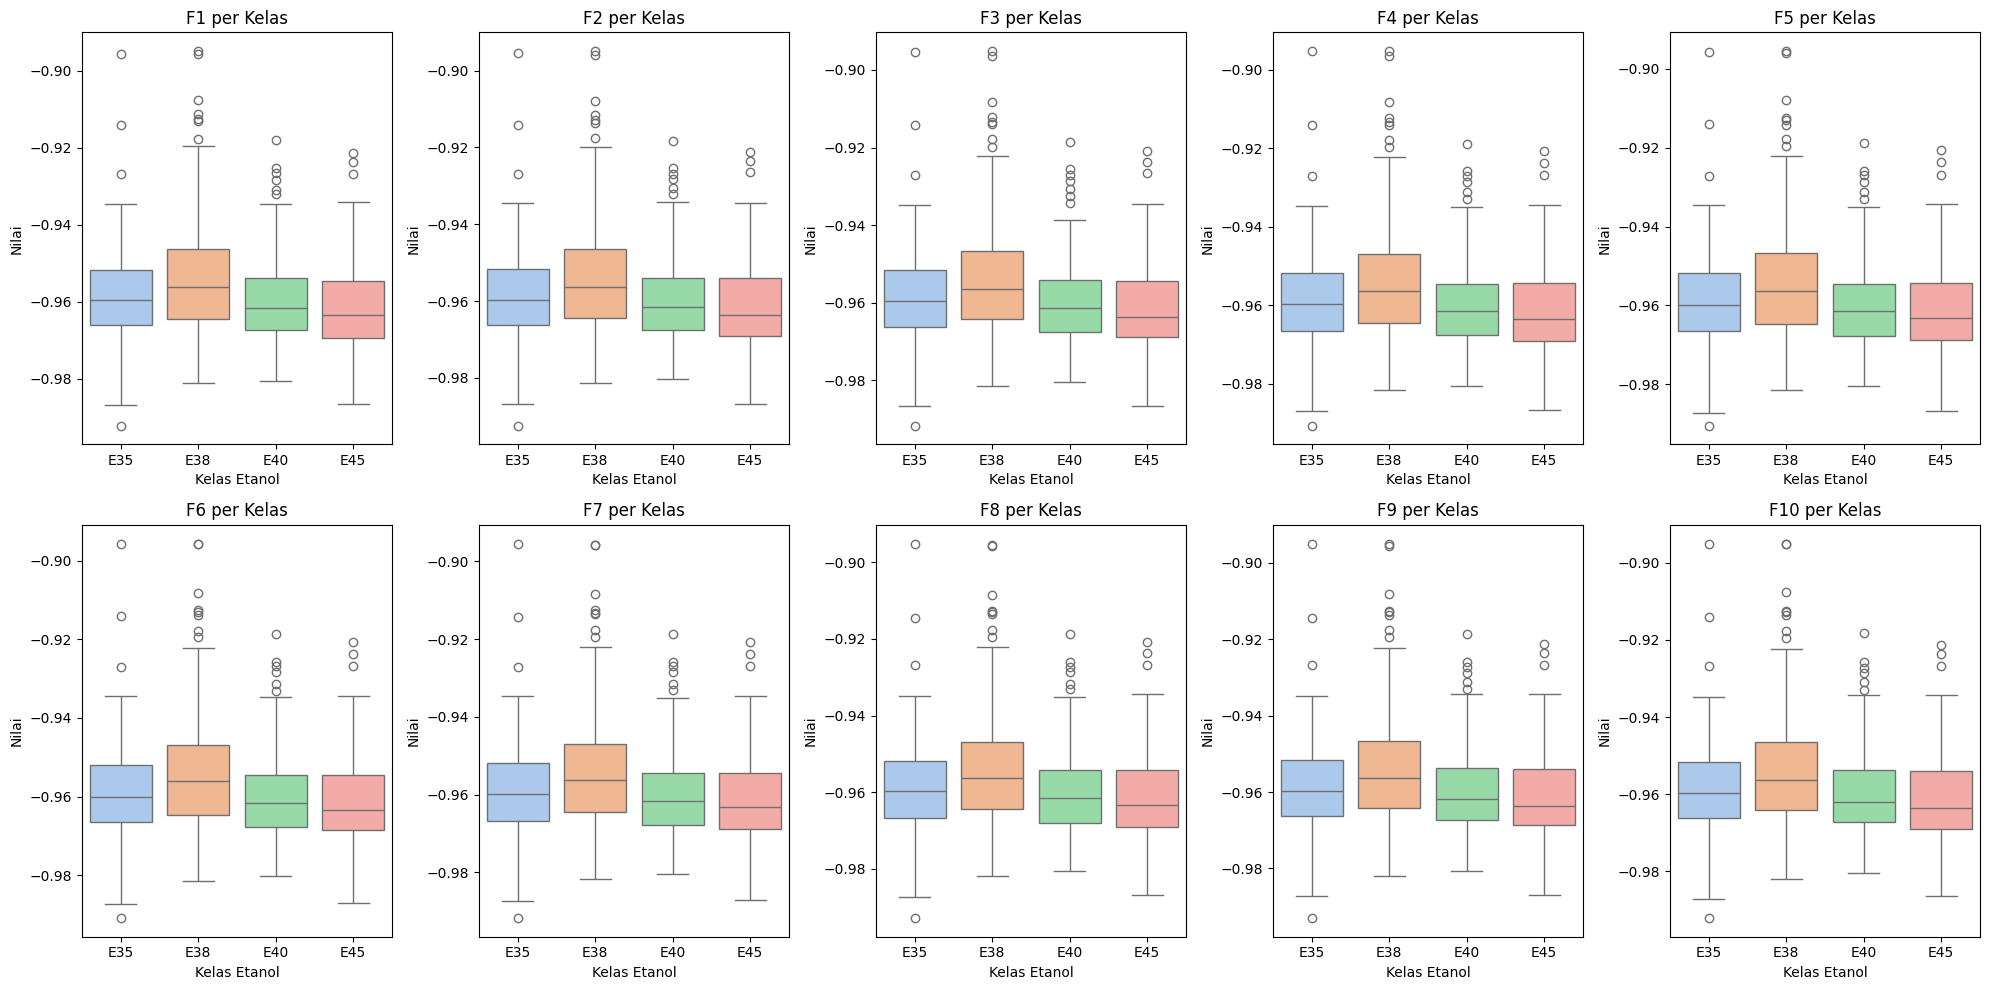

In [53]:
# ---------------------------------------------------
# 2. Deteksi outlier menggunakan IQR
# ---------------------------------------------------
outlier_summary = {}
for col in df_train.columns[:-1]:  # exclude 'Class'
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    if len(outliers) > 0:
        outlier_summary[col] = len(outliers)

print("\n=== Jumlah Outlier per Fitur ===")
print(outlier_summary if len(outlier_summary) > 0 else "Tidak ada outlier terdeteksi")
plt.figure(figsize=(15,6))
sns.boxplot(x="ClassName", y=feature, data=df_train, palette="pastel", hue=None)

plt.title("Boxplot Semua Fitur - Deteksi Outlier")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=90)
plt.show()

df_no_outlier = df_train.copy()

for col in df_train.columns[:-1]:  # exclude label
    Q1 = df_no_outlier[col].quantile(0.25)
    Q3 = df_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outlier = df_no_outlier[(df_no_outlier[col] >= lower_bound) & (df_no_outlier[col] <= upper_bound)]

print(f"Sisa data setelah hapus outlier di semua fitur: {df_no_outlier.shape[0]}")

label_map = {1: "E35", 2: "E38", 3: "E40", 4: "E45"}
df_train["ClassName"] = df_train["Class"].map(label_map)

# Plot boxplot per kelas untuk beberapa fitur (agar tidak terlalu padat)
features_to_plot = df_train.columns[:10]  # ambil 10 fitur pertama sebagai contoh

plt.figure(figsize=(20,10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x="ClassName", y=feature, data=df_train, hue="ClassName", palette="pastel", legend=False)

    plt.title(f"{feature} per Kelas")
    plt.xlabel("Kelas Etanol")
    plt.ylabel("Nilai")

plt.tight_layout()
plt.show()

Kode ini digunakan untuk mengeksplorasi dataset setelah proses penghapusan outlier. Pertama, dicetak informasi dasar dataset, termasuk jumlah baris (jumlah sampel) dan jumlah kolom (fitur plus label), sehingga kita bisa mengetahui seberapa banyak data yang tersisa setelah outlier dihapus. Selanjutnya, ditampilkan daftar nama kolom untuk memastikan semua fitur dan label tercatat dengan benar. Kemudian, 10 baris pertama dari dataset ditampilkan menggunakan head(10) agar bisa melihat contoh nilai fitur dan label pada data yang sudah “bersih”. Terakhir, kode menghitung dan menampilkan distribusi kelas menggunakan Counter, sehingga kita bisa mengecek apakah penghapusan outlier mengubah keseimbangan jumlah sampel di setiap kelas.

In [32]:
import pandas as pd

# Misal df_no_outlier adalah dataset setelah hapus outlier
print("=== Info Dataset Setelah Hapus Outlier ===")
print(f"Jumlah baris (rows) : {df_no_outlier.shape[0]}")
print(f"Jumlah kolom (features + label) : {df_no_outlier.shape[1]}")

# Tampilkan nama kolom
print("\nNama fitur / kolom:")
print(df_no_outlier.columns.tolist())

# Tampilkan 10 data pertama
print("\n10 data pertama (head):")
print(df_no_outlier.head(10))

# Distribusi kelas setelah hapus outlier
from collections import Counter
print("\nDistribusi kelas:")
print(Counter(df_no_outlier['Class']))


=== Info Dataset Setelah Hapus Outlier ===
Jumlah baris (rows) : 135
Jumlah kolom (features + label) : 1753

Nama fitur / kolom:
['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71', 'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F80', 'F81', 'F82', 'F83', 'F84', 'F85', 'F86', 'F87', 'F88', 'F89', 'F90', 'F91', 'F92', 'F93', 'F94', 'F95', 'F96', 'F97', 'F98', 'F99', 'F100', 'F101', 'F102', 'F103', 'F104', 'F105', 'F106', 'F107', 'F108', 'F109', 'F110', 'F111', 'F112', 'F113', 'F114', 'F115', 'F116', 'F117', 'F118', 'F119', 'F120', 'F121', 'F122', 'F

## Label Encoding

Kode ini melakukan proses encoding label pada dataset EthanolLevel menggunakan LabelEncoder, yang berfungsi mengubah label berbentuk kategori (misalnya kelas 35%, 38%, 40%, 45%) menjadi representasi numerik agar dapat diproses oleh model machine learning seperti CNN. Pertama, objek LabelEncoder() dibuat, lalu fit_transform() diterapkan pada y_train untuk mempelajari kelas unik sekaligus mengubahnya menjadi angka 0–3. Selanjutnya, transform() diterapkan pada y_test menggunakan mapping yang sama agar tidak terjadi inkonsistensi label. Dua baris pertama print() menampilkan daftar label unik sebelum dan sesudah encoding untuk memastikan proses berjalan benar. Terakhir, kode juga menampilkan 10 label pertama sebelum dan sesudah encoding agar kita dapat melihat contoh perubahan label secara langsung, misalnya dari [1,1,2,3,...] menjadi [0,0,1,2,...]. Dengan cara ini, label menjadi siap digunakan dalam pemodelan CNN.

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc  = encoder.transform(y_test)

# Tampilkan hasil encode
print("Label unik sebelum encoding :", np.unique(y_train))
print("Label unik sesudah encoding :", np.unique(y_train_enc))

# Contoh 10 label pertama
print("\n10 label asli     :", y_train[:10])
print("10 label encoded  :", y_train_enc[:10])


Label unik sebelum encoding : [1 2 3 4]
Label unik sesudah encoding : [0 1 2 3]

10 label asli     : [1 1 1 1 1 1 1 1 1 2]
10 label encoded  : [0 0 0 0 0 0 0 0 0 1]


## Reshape Data

Kode ini melakukan proses reshape pada dataset time series agar sesuai dengan format input yang dibutuhkan oleh model. Setelah data dinormalisasi, array X_train_scaled dan X_test_scaled masih memiliki bentuk 2D, yaitu (jumlah_samples, jumlah_fitur). model membutuhkan input dengan tiga dimensi: (samples, timesteps, channels). Karena dataset EthanolLevel hanya memiliki satu dimensi (satu channel), maka dimensi terakhir ditambahkan dengan nilai 1. Perintah .reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1) mengubah data menjadi bentuk (504, 1751, 1) untuk train dan (500, 1751, 1) untuk test, sehingga setiap sample dipandang sebagai sinyal 1D dengan 1751 titik dan 1 channel. Dua baris terakhir mencetak bentuk akhirnya untuk memastikan data siap digunakan sebagai input pada model CNN.

In [43]:
import numpy as np

X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat  = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

print("Shape Train (flat):", X_train_flat.shape)
print("Shape Test  (flat):", X_test_flat.shape)




Shape Train (flat): (504, 1751)
Shape Test  (flat): (500, 1751)


# Pemodelan Data

## Perbandingan Model


In [42]:
# -----------------------------
# Import library
# -----------------------------
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# -----------------------------
# 1. Pisahkan fitur & label
# -----------------------------
# Pastikan hanya fitur numerik
X = df_train.drop(columns=["Class", "ClassName"], errors='ignore')
y = df_train["Class"]

# -----------------------------
# 2. Normalisasi fitur
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3. Split train-test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 4. Definisi model
# -----------------------------
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=10, random_state=42, class_weight="balanced"
    ),
    "SVM (RBF)": SVC(kernel='rbf', C=10, gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
}

# -----------------------------
# 5. Train & Evaluasi
# -----------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)

    results.append([name, acc])
    print(f"\n=== {name} ===")
    print("Akurasi :", acc)
    print("Prediksi 5 data pertama :", preds[:5])
    print("Label sebenarnya        :", y_test.values[:5])

# -----------------------------
# 6. Tabel perbandingan akurasi
# -----------------------------
df_results = pd.DataFrame(results, columns=["Model", "Akurasi"])
print("\n=== PERBANDINGAN AKURASI MODEl ===")
print(df_results)



=== Random Forest ===
Akurasi : 0.6336633663366337
Prediksi 5 data pertama : [2 2 2 4 1]
Label sebenarnya        : [3 3 2 4 2]

=== SVM (RBF) ===
Akurasi : 0.6633663366336634
Prediksi 5 data pertama : [2 2 2 4 3]
Label sebenarnya        : [3 3 2 4 2]

=== KNN ===
Akurasi : 0.44554455445544555
Prediksi 5 data pertama : [2 2 2 4 1]
Label sebenarnya        : [3 3 2 4 2]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression ===
Akurasi : 0.8811881188118812
Prediksi 5 data pertama : [3 3 2 4 2]
Label sebenarnya        : [3 3 2 4 2]

=== PERBANDINGAN AKURASI MODEl ===
                 Model   Akurasi
0        Random Forest  0.633663
1            SVM (RBF)  0.663366
2                  KNN  0.445545
3  Logistic Regression  0.881188


## Model yang dipakai

Kode di bawah melakukan proses pembangunan model klasifikasi Logistic Regression untuk dataset df_train. Pertama, fitur (X) dipisahkan dari label target (y), yaitu kolom "Class". Karena sebagian besar algoritma Machine Learning sensitif terhadap skala data, fitur kemudian dinormalisasi menggunakan StandardScaler, yang mengubah setiap fitur agar memiliki mean = 0 dan standar deviasi = 1. Setelah itu data dibagi menjadi 80% data latih dan 20% data uji menggunakan train_test_split, dengan parameter stratify=y agar distribusi kelas tetap seimbang antara train dan test. Proses ini penting terutama pada dataset klasifikasi yang mungkin memiliki distribusi kelas tidak seimbang.

Selanjutnya, model Logistic Regression multikelas dibuat menggunakan parameter multi_class='multinomial' dan solver lbfgs, yang direkomendasikan untuk klasifikasi multikelas. Parameter max_iter=500 memastikan algoritma optimisasi memiliki cukup iterasi untuk mencapai konvergensi. Setelah model didefinisikan, model dilatih menggunakan data train (logreg.fit(X_train, y_train)), sehingga model mempelajari hubungan antara fitur dan label. Model ini nantinya dapat digunakan untuk melakukan prediksi dan evaluasi kinerja pada data test.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Pisahkan fitur dan label ---
# Pastikan hanya kolom numerik (hapus kolom label/kolom string)
X = df_train.drop(columns=["Class", "ClassName"], errors='ignore')  # hapus kolom string jika ada
y = df_train["Class"]

# --- Normalisasi fitur ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Split data (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Cek shape data
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)


Shape X_train: (403, 1751)
Shape X_test : (101, 1751)
Shape y_train: (403,)
Shape y_test : (101,)


In [46]:
# Model Logistic Regression
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)

# Train
logreg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

# Evaluasi Model

Kode di bawah melakukan evaluasi menyeluruh terhadap model Logistic Regression. Pertama, model memprediksi label untuk data uji (y_pred) dan kemudian menghitung akurasi menggunakan accuracy_score untuk melihat seberapa sering prediksi benar. Selanjutnya, kode menampilkan 5 prediksi pertama beserta label sebenarnya sebagai contoh performa model. Evaluasi diperluas dengan classification report, yang memuat nilai precision, recall, dan f1-score untuk setiap kelas, sehingga Anda dapat melihat kualitas prediksi per kelas. Terakhir, confusion matrix dihitung dan divisualisasikan menggunakan heatmap, yang memberikan gambaran visual mengenai jumlah prediksi benar dan salah pada setiap kelas, sehingga memudahkan analisis kesalahan model.

=== Logistic Regression ===
Akurasi : 0.8811881188118812
Prediksi 5 data pertama : [3 3 2 4 2]
Label sebenarnya        : [3, 3, 2, 4, 2]

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.96      0.92      0.94        25
           2       0.79      0.76      0.78        25
           3       0.79      0.88      0.84        26
           4       1.00      0.96      0.98        25

    accuracy                           0.88       101
   macro avg       0.89      0.88      0.88       101
weighted avg       0.88      0.88      0.88       101



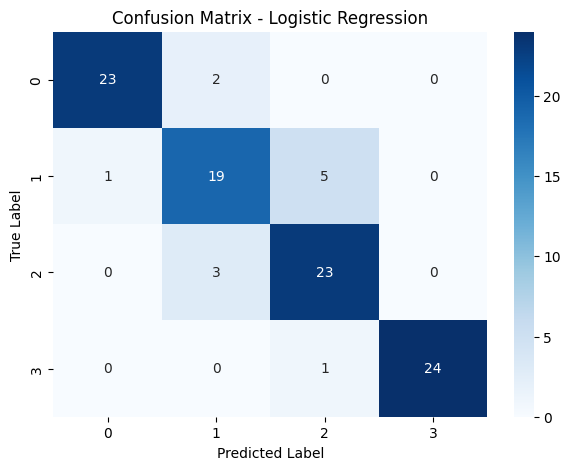

In [48]:
# --- Prediksi ---
y_pred = logreg.predict(X_test)

# --- Akurasi ---
accuracy = accuracy_score(y_test, y_pred)
print("=== Logistic Regression ===")
print("Akurasi :", accuracy)

# --- Prediksi contoh ---
print("Prediksi 5 data pertama :", y_pred[:5])
print("Label sebenarnya        :", list(y_test[:5]))

# --- Classification Report ---
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Deployment Streamlit

## Melatih dan menyimpan Model

Kode train_model.py ini merupakan skrip Python untuk melatih model klasifikasi Logistic Regression yang memprediksi level etanol berdasarkan data sinyal dengan banyak fitur. Pertama, skrip ini menentukan path relatif untuk folder dataset (data/ethanollevel) dan folder model (models), kemudian memuat data training dan testing dari file CSV. Data dipisahkan menjadi fitur (X_train, X_test) dan target (y_train, y_test). Setelah itu, semua fitur diskalakan menggunakan StandardScaler dari scikit-learn agar setiap fitur memiliki rata-rata 0 dan standar deviasi 1, yang membantu algoritma Logistic Regression agar konvergen lebih stabil dan cepat.

Setelah preprocessing, model Logistic Regression dilatih dengan parameter max_iter=2000, solver lbfgs, dan konfigurasi multinomial karena target memiliki lebih dari dua kelas. Model kemudian dievaluasi dengan data testing, menampilkan akurasi dan classification report untuk melihat performa pada masing-masing kelas. Terakhir, scaler dan model disimpan bersama dalam satu file pickle (logreg_model.pkl) menggunakan joblib.dump, sehingga keduanya dapat dimuat kembali di aplikasi lain seperti Streamlit untuk prediksi baru tanpa perlu melatih ulang model. Pendekatan ini memastikan pipeline preprocessing dan model tetap konsisten saat digunakan di lingkungan produksi.

In [ ]:
# scripts/train_model.py
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

# --------------------------------------
# Path dataset & model relatif
# --------------------------------------
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))  # folder 'ethanol_app'
DATA_DIR = os.path.join(BASE_DIR, "data", "ethanollevel")
MODEL_DIR = os.path.join(BASE_DIR, "models")

TRAIN_CSV = os.path.join(DATA_DIR, "EthanolLevel_TRAIN.csv")
TEST_CSV  = os.path.join(DATA_DIR, "EthanolLevel_TEST.csv")
SCALER_FILE = os.path.join(MODEL_DIR, "scaler.pkl")
MODEL_FILE  = os.path.join(MODEL_DIR, "logreg_model.pkl")

# --------------------------------------
# Load dataset
# --------------------------------------
train_df = pd.read_csv(TRAIN_CSV)
test_df  = pd.read_csv(TEST_CSV)

X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]
X_test  = test_df.drop(columns=["target"])
y_test  = test_df["target"]

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# --------------------------------------
# Preprocessing: StandardScaler
# --------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --------------------------------------
# Training Logistic Regression
# --------------------------------------
logreg = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_scaled, y_train)

# --------------------------------------
# Evaluasi model
# --------------------------------------
y_pred = logreg.predict(X_test_scaled)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# --------------------------------------
# Simpan model + scaler sebagai 1 file pkl
# --------------------------------------
os.makedirs(MODEL_DIR, exist_ok=True)
MODEL_PATH = os.path.join(MODEL_DIR, "logreg_model.pkl")

# Simpan dictionary dengan 2 objek: scaler + logreg
model_package = {
    "scaler": scaler,
    "logreg": logreg
}
joblib.dump(model_package, MODEL_PATH)
print(f"\nModel dan scaler tersimpan di: {MODEL_PATH}")


## Hasil Implementasi APP streamlit

Kode streamlit_app.py ini adalah aplikasi web interaktif menggunakan Streamlit untuk memprediksi level etanol berdasarkan input 1751 fitur sinyal. Aplikasi ini pertama-tama memuat model Logistic Regression dan scaler yang sudah dilatih sebelumnya (logreg_model.pkl) menggunakan joblib. Pengguna dapat memasukkan nilai sinyal secara manual dalam bentuk teks yang dipisahkan dengan koma, atau mengisi otomatis dari file example.txt. Model kemudian melakukan prediksi kelas etanol dan menampilkan kadar alkohol yang sesuai berdasarkan kelas tersebut (misal: kelas 1 → 35%, kelas 2 → 38%).

Selain prediksi utama, aplikasi ini memberikan analisis tambahan berupa statistik input (rata-rata, median, standar deviasi, minimum, maksimum) dan visualisasi: distribusi nilai sinyal menggunakan histogram dan probabilitas prediksi per kelas menggunakan bar plot. Hal ini membantu pengguna memahami distribusi input dan alasan model cenderung memilih kelas tertentu (misal kelas dengan probabilitas tertinggi). Dengan pendekatan ini, aplikasi tidak hanya memberikan prediksi, tetapi juga insight visual dan numerik, sehingga prediksi menjadi lebih transparan dan mudah dianalisis.

In [ ]:
# streamlit_app.py
import streamlit as st
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------
# Setup paths relatif
# --------------------------------------
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
MODEL_PATH = os.path.join(BASE_DIR, "models", "logreg_model.pkl")
EXAMPLE_PATH = os.path.join(BASE_DIR, "example.txt")  # file contoh input

# --------------------------------------
# Load model + scaler
# --------------------------------------
@st.cache_data
def load_model(path):
    model_package = joblib.load(path)
    return model_package["scaler"], model_package["logreg"]

scaler, logreg = load_model(MODEL_PATH)

# --------------------------------------
# Judul aplikasi
# --------------------------------------
st.title("Prediksi Level Etanol")
st.markdown("""
Masukkan 1751 nilai sinyal etanol, pisahkan dengan koma (,).
Contoh: `-0.9357,-0.9360,-0.9361,...`
""")

# --------------------------------------
# Input dari user
# --------------------------------------
user_input = st.text_area("Masukkan nilai (1751 fitur)")

# --------------------------------------
# Tombol Prediksi
# --------------------------------------
if st.button("Prediksi"):
    try:
        # Ubah input ke list float
        input_list = [float(x.strip()) for x in user_input.split(",")]

        # Cek panjang input
        if len(input_list) != 1751:
            st.error(f"Input harus 1751 nilai, sekarang: {len(input_list)}")
        else:
            # Konversi ke array 2D
            input_array = np.array(input_list).reshape(1, -1)

            # Scaling
            input_scaled = scaler.transform(input_array)

            # Prediksi kelas dan probabilitas
            pred = logreg.predict(input_scaled)
            pred_proba = logreg.predict_proba(input_scaled)[0]

            # Mapping prediksi ke kadar alkohol
            def pred_to_alcohol(pred):
                if pred == 1:
                    return "35%"
                elif pred == 2:
                    return "38%"
                elif pred == 3:
                    return "40%"
                elif pred == 4:
                    return "45%"
                else:
                    return "Unknown"

            kadar_alcohol = pred_to_alcohol(pred[0])
            st.success(f"Hasil prediksi level etanol: {pred[0]} (kadar alkohol: {kadar_alcohol})")

            # --------------------------------------
            # Statistik input
            # --------------------------------------
            st.subheader("Statistik Input")
            st.write("Rata-rata:", np.mean(input_list))
            st.write("Median:", np.median(input_list))
            st.write("Standar deviasi:", np.std(input_list))
            st.write("Min:", np.min(input_list))
            st.write("Max:", np.max(input_list))

            # Visualisasi distribusi input
            st.subheader("Distribusi Nilai Sinyal")
            fig, ax = plt.subplots(figsize=(8, 4))
            sns.histplot(input_list, bins=50, kde=True, color="skyblue", ax=ax)
            ax.set_xlabel("Nilai Sinyal")
            ax.set_ylabel("Frekuensi")
            st.pyplot(fig)

            # Visualisasi probabilitas prediksi
            st.subheader("Probabilitas Prediksi per Kelas")
            classes = logreg.classes_
            fig2, ax2 = plt.subplots(figsize=(6, 4))
            sns.barplot(x=classes, y=pred_proba, palette="pastel", ax=ax2)
            ax2.set_xlabel("Kelas")
            ax2.set_ylabel("Probabilitas")
            st.pyplot(fig2)

            # Analisis kenapa condong ke kelas 1 (E35)
            max_class_idx = np.argmax(pred_proba)
            st.info(f"Model cenderung memprediksi kelas `{classes[max_class_idx]}` "
                    f"karena probabilitasnya paling tinggi ({pred_proba[max_class_idx]*100:.2f}%).")

    except Exception as e:
        st.error(f"Terjadi kesalahan: {e}")

# --------------------------------------
# Contoh input otomatis dari example.txt
# --------------------------------------
if st.checkbox("Isi contoh otomatis "):
    try:
        with open(EXAMPLE_PATH, "r") as f:
            example_content = f.read().strip()
        st.text_area("Contoh input", value=example_content, height=150)
    except Exception as e:
        st.error(f"Gagal membaca file example.txt: {e}")


## Tampilan UI

UI ini adalah halaman input untuk sebuah aplikasi prediksi, kemungkinan berbasis machine learning atau pemrosesan sinyal, yang dirancang untuk memprediksi level atau kadar etanol berdasarkan data sinyal yang dimasukkan.

Judul Utama: Prediksi Level Etanol

Ini adalah tujuan utama dari halaman ini, yaitu untuk melakukan estimasi atau perkiraan kadar etanol.

Instruksi Input: Masukkan 1751 nilai sinyal etanol, pisahkan dengan koma (,).

Ini adalah instruksi kunci. Pengguna diminta untuk memasukkan serangkaian data numerik.

Jumlah Data: Data harus berjumlah tepat 1751 nilai. Angka ini menunjukkan bahwa model prediksi membutuhkan input dalam dimensi spesifik ini (misalnya, 1751 titik data dari spektrum atau time series).

Format Pemisah: Nilai-nilai tersebut harus dipisahkan menggunakan koma (,).

Contoh Format Input: Contoh: -0.9357, -0.9360, -0.9361, ...

Ini memberikan panduan visual tentang bagaimana data harus diformat, termasuk penggunaan tanda negatif dan desimal, serta pemisahan dengan koma.

Area Input: Masukkan nilai (1751 fitur)

Ini adalah kotak teks besar di mana pengguna akan mengetik atau menempelkan ke-1751 nilai sinyal sesuai format yang diminta. Label "(1751 fitur)" menggarisbawahi persyaratan jumlah data.

Tombol Aksi: Prediksi

Ini adalah tombol yang akan diklik pengguna setelah semua data dimasukkan. Mengklik tombol ini akan memicu proses prediksi oleh aplikasi.

Opsi Tambahan (Checkbox): Isi contoh otomatis

Ini adalah checkbox yang, jika dicentang, kemungkinan akan mengisi area input secara otomatis dengan 1751 nilai contoh yang valid. Ini berguna untuk pengujian, demonstrasi, atau bagi pengguna yang ingin melihat format data yang benar tanpa harus memasukkan data secara manual.

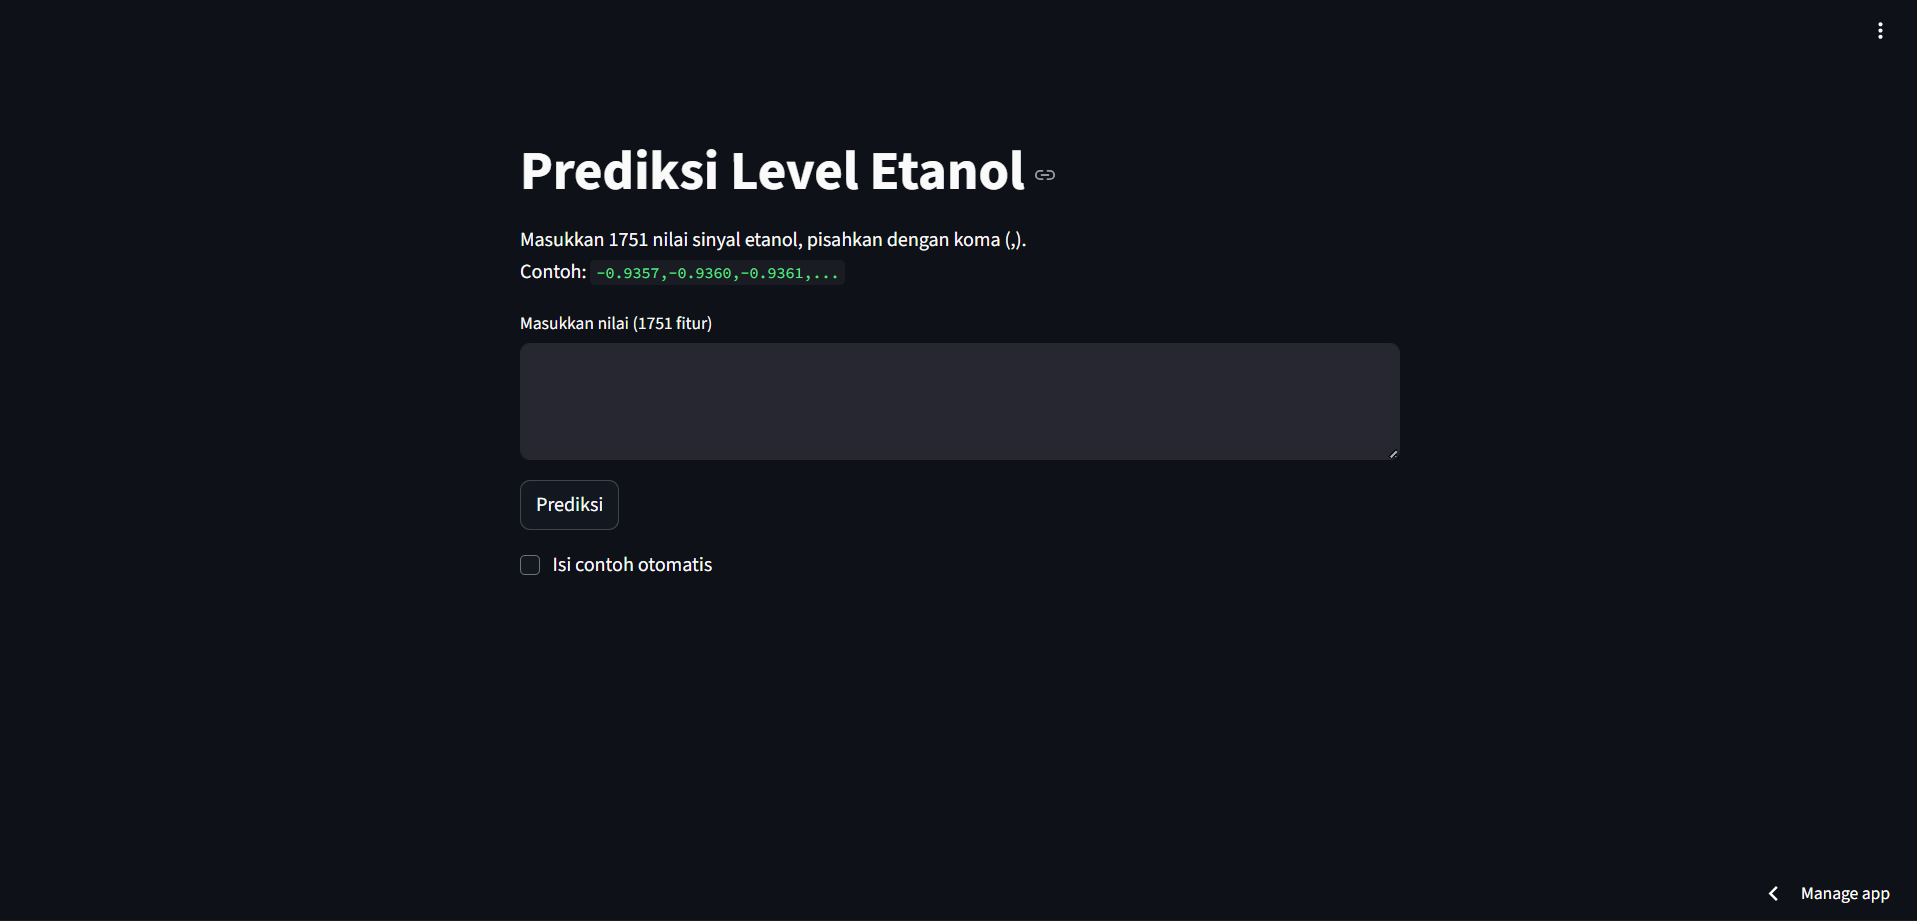

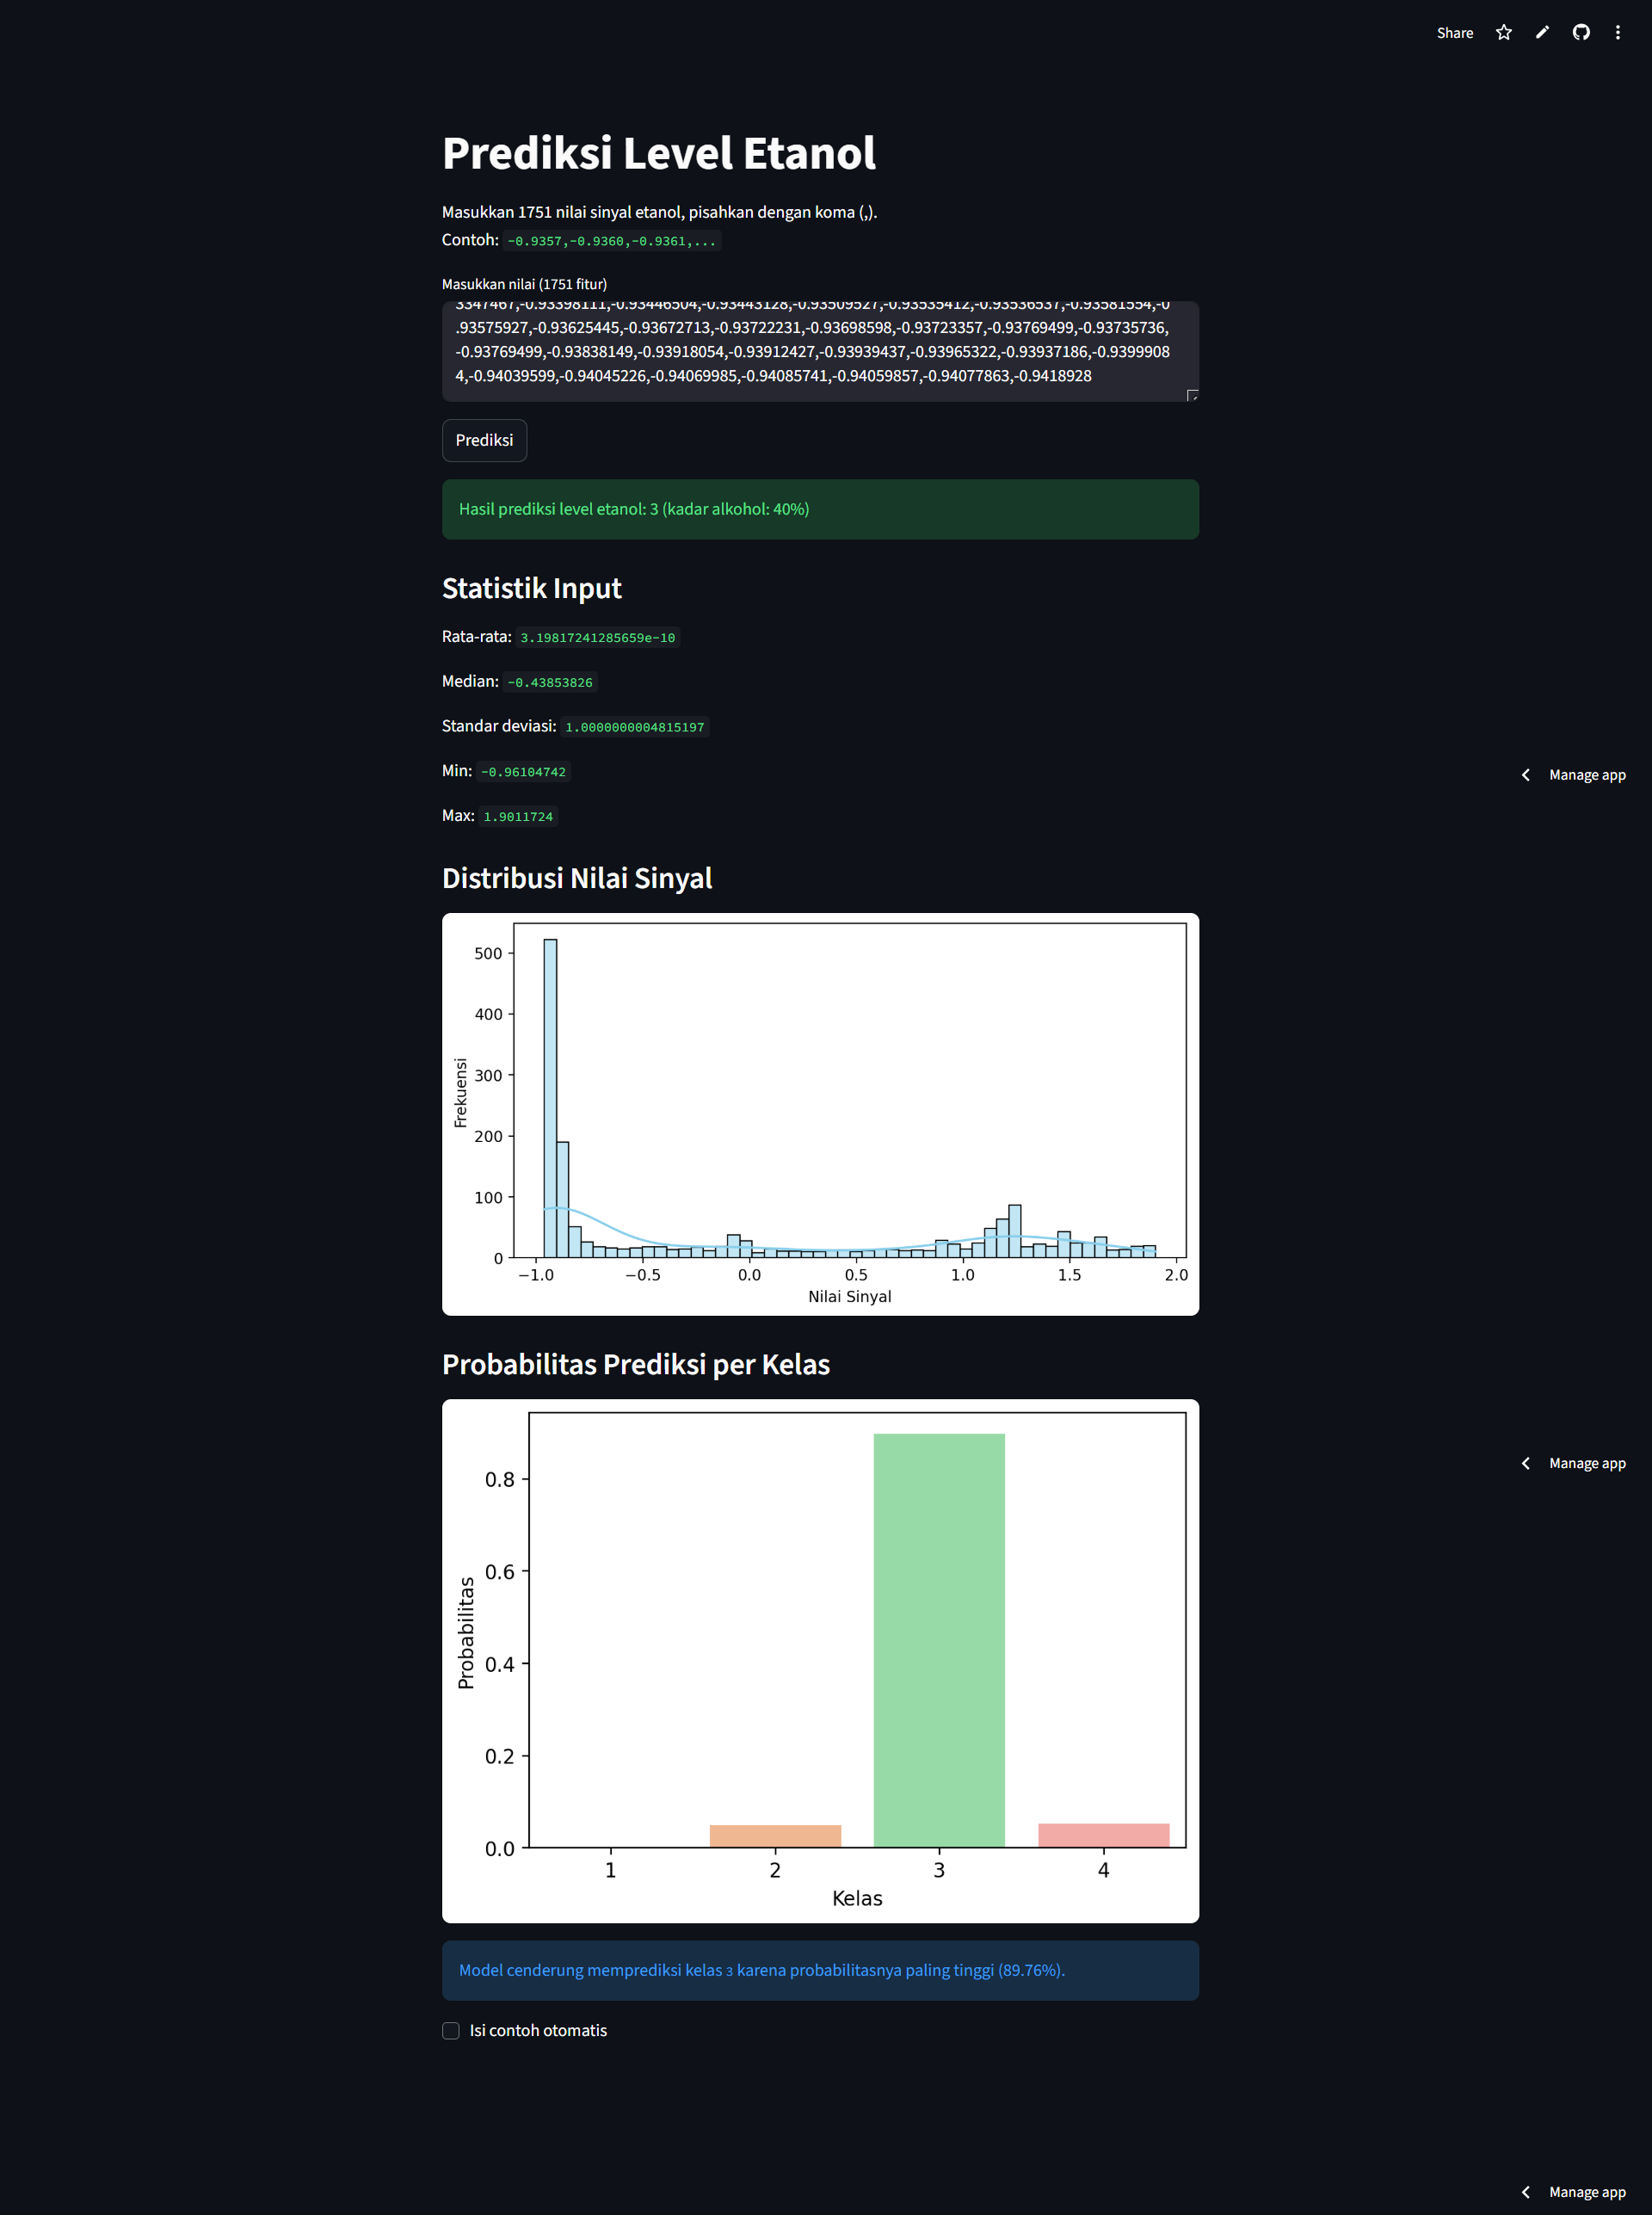

## Link WEB

Berikut merupakan link menuju aplikasi ethanol prediksi :

https://uasethanol23136abdulmalik.streamlit.app/